In [2]:
from pathlib import Path

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np
from py_linq import Enumerable
from matplotlib.image import imread


In [3]:
fname = Path('NE1_50M_SR_W/NE1_50M_SR_W.tif')

In [4]:
if not fname.exists():
    raise FileNotFoundError(f"File {fname} does not exist.\nPlease download the Natural Earth data from https://www.naturalearthdata.com/downloads/50m-natural-earth-1/50m-natural-earth-i-with-shaded-relief-and-water/ and place it here in .")

In [5]:
records = list(shpreader.Reader(shpreader.natural_earth(
    resolution='10m', category='cultural',
    name='admin_1_states_provinces',
)).records())

states_to_render = ["FL"]

# states = [[x for x in records if (x.attributes['iso_a2'] == 'US') and (x.attributes['postal'] == state)][0] for state in states_to_render]
states = Enumerable(records).where(lambda x: x.attributes['iso_a2'] == 'US').where(lambda x: x.attributes['postal'] in states_to_render).to_list()
states_geom = cfeature.ShapelyFeature([x.geometry for x in states], ccrs.PlateCarree())

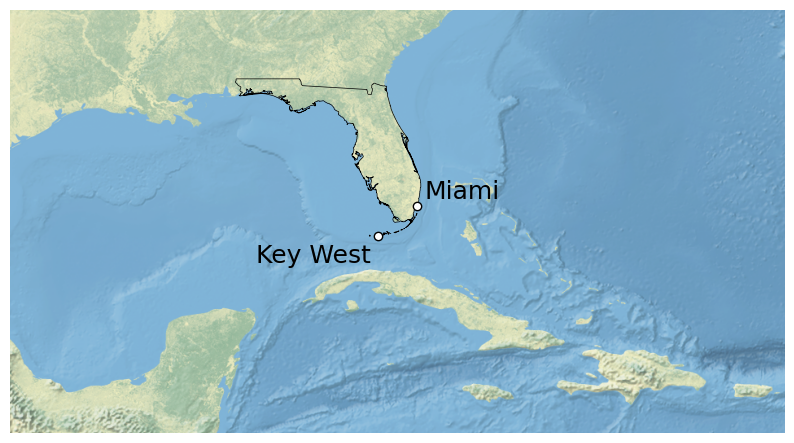

In [11]:
miami_coords = [-80.195697, 25.778895]
key_west_coords = [-81.780564, 24.555917]

fig, ax = plt.subplots(1,1, figsize = (10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
# ax.fill_betweenx([-90, -80], 0, 180, fc='w')
# bodr = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m')
# ax.add_feature(bodr, edgecolor="k", lw=.2, facecolor='w')
# ax.stock_img(alpha=1)
# ax.fill_betweenx([0, 90], -180, 180, fc='b', alpha=.2)


ax.imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(), 
          extent=[-180, 180, -90, 90])

ax.add_feature(states_geom, facecolor="none", edgecolor="k", lw=.5)


ax.plot(miami_coords[0], miami_coords[1], 'o', color='w', markeredgecolor='k')
ax.plot(key_west_coords[0], key_west_coords[1], 'o', color='w', markeredgecolor='k')


# x_lim = np.array(ax.get_xlim())
# y_lim = np.array(ax.get_ylim())

# buffx = 15
# x_lim[0] = x_lim[0] - buffx
# x_lim[1] = x_lim[1] + buffx
# 
# buffy = 8
# y_lim[0] = y_lim[0] - buffy
# y_lim[1] = y_lim[1] + buffy

x_lim = [-96.85980735, -65.11645365]
y_lim = [16.4947681, 33.8400439]

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

offset = .3

ax.text(miami_coords[0] + offset, miami_coords[1] + offset, 'Miami', fontsize=18)
ax.text(key_west_coords[0] - offset, key_west_coords[1] - offset, 'Key West', horizontalalignment='right', verticalalignment='top', fontsize=18)

ax.axis('off')

fig.savefig('Map_Florida.pdf', dpi=300, bbox_inches='tight')

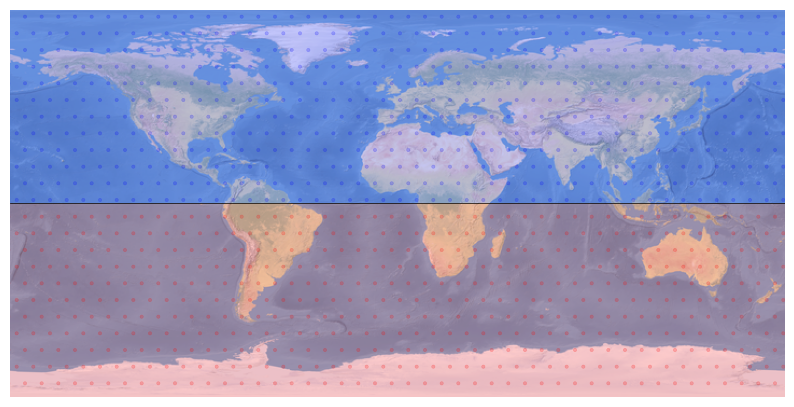

In [23]:
fig, ax = plt.subplots(1,1, figsize = (10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
# ax.fill_betweenx([-90, 90], -180, 180, fc='lightgrey')
# bodr = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m')
# ax.add_feature(bodr, edgecolor="k", lw=.2, facecolor='w')
ax.stock_img(alpha=1)
# ax.fill_betweenx([0, 90], -180, 180, fc='none', hatch="///", ec='b', lw=0)
# ax.fill_betweenx([-90, 0], -180, 180, fc='none', hatch="///", ec='r', lw=0)
# import matplotlib as mpl
# pl.rcParams['hatch.linewidth'] = 1.5

ax.fill_betweenx([0, 90], -180, 180, fc='none', hatch=".", ec='b', lw=0, alpha=0.2)
ax.fill_betweenx([-90, 0], -180, 180, fc='none', hatch=".", ec='r', lw=0, alpha=0.2)
plt.rcParams['hatch.linewidth'] = .4

ax.fill_betweenx([0, 90], -180, 180, fc='b', alpha=.2)
ax.fill_betweenx([-90, 0], -180, 180, fc='r', alpha=.2)
ax.plot([-180, 180], [0, 0], color='black', lw=.5, transform=ccrs.PlateCarree())

# ax.fill_betweenx(y_lim, x_lim[0], x_lim[1], fc='none', ec='k', lw=.5, zorder=10)

ax.axis('off')

fig.savefig('Map_Overview.pdf', dpi=300, bbox_inches='tight')